# A toy Neural Network in 2 dimensions

## Generating some data
Lets generate a classification dataset that is not easily linearly separable. Our favorite example is the spiral dataset, which can be generated as follows:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

(-1.0, 1.0)

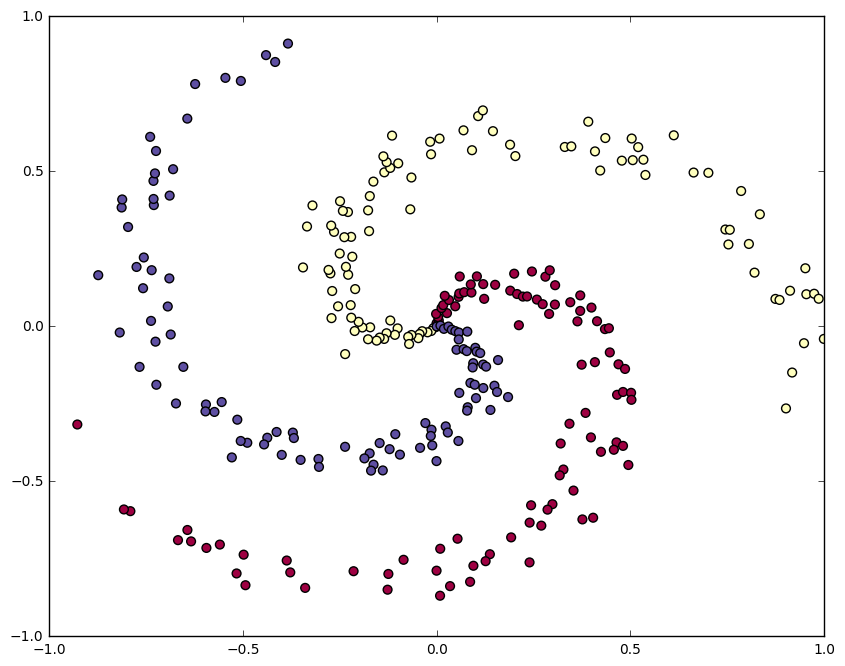

In [2]:
N = 100  # number of point per class
D = 2 # dim
K = 3 # number of class
X = np.zeros((N * K, D)) # X data
y = np.zeros((N * K), dtype=np.uint8)  # class labers
for j in range(K):
    idx = np.arange(N * j, N * (j + 1))
    r = np.linspace(0.0, 1.0, N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[idx] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[idx] = j

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.ylim(-1.0, 1.0)
plt.xlim(-1.0, 1.0)

## Training a Softmax Linear Classifier
### Initialize the parameters

In [3]:
# Initialize parameters randomly
W = 0.01 * np.random.randn(D, K)
b = np.zeros((K,))

### Compute the class scores

In [4]:
# Compute class scores for a linear classifier
scores = X.dot(W) + b

### Compute the loss

In [5]:
# Get unnormalized probs
exp_scores = np.exp(scores - np.max(scores, axis=1, keepdims=True))
# Normalize them 
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
# Get data loss
num_examples = N * K
data_loss = -np.mean(np.log(probs[np.arange(num_examples), y]))
# Use L2 regularization
reg = 1e-3
reg_loss = 0.5 * reg * np.sum(W ** 2)
loss = data_loss + reg_loss

### Compute Gradients

In [6]:
# First compute the grads of 'scores' with 'loss'
dscores = probs
dscores[np.arange(num_examples), y] += -1.0
dscores /= num_examples

In [7]:
# Compute the grads of params
dW = (X.T).dot(dscores) + reg * W
db = np.sum(dscores, axis=0)

### Peforming a parameter update

In [8]:
# Update the params with SGD
step_size = 1e-3
W += -step_size * dW
b += step_size* db

### Putting it all together: Training a Softmax Classifier

In [9]:
# Train a Linear Classifier

# Initizlize the params randomly
weight_decay = 1e-2
W = weight_decay * np.random.randn(D, K)
b = np.zeros((K,))

# Set some hyperparameters
step_size = 1e-0
reg = 1e-3  # for L2 regularization

# SGD loop
num_examples = X.shape[0]
num_iterations = 200
loss_history = []
for i in range(num_iterations):
    
    # evaluate class scores
    scores = X.dot(W) + b
    
    # Compute probs
    exp_scores = np.exp(scores - np.max(scores, axis=1, keepdims=True))
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    # Compute the loss
    data_loss = -np.mean(np.log(probs[np.arange(num_examples), y]))
    reg_loss = 0.5 * reg * np.sum(W ** 2)
    loss = data_loss + reg_loss
    loss_history.append(loss)
    if i % 10 == 0:
        print("Iteration %d: loss %f" % (i, loss))
    
    # Compute the grads
    dscores = probs
    dscores[np.arange(num_examples), y] += -1.0
    dscores /= num_examples
    
    # BP
    dW = (X.T).dot(dscores)
    db = np.sum(dscores, axis=0)
    
    dW += reg * W # Add reguralization
    
    # Perfprm parameter updation
    W += -step_size * dW
    b += -step_size * db

Iteration 0: loss 1.099005
Iteration 10: loss 0.911461
Iteration 20: loss 0.841841
Iteration 30: loss 0.810330
Iteration 40: loss 0.794007
Iteration 50: loss 0.784763
Iteration 60: loss 0.779197
Iteration 70: loss 0.775694
Iteration 80: loss 0.773416
Iteration 90: loss 0.771898
Iteration 100: loss 0.770865
Iteration 110: loss 0.770152
Iteration 120: loss 0.769653
Iteration 130: loss 0.769300
Iteration 140: loss 0.769049
Iteration 150: loss 0.768869
Iteration 160: loss 0.768739
Iteration 170: loss 0.768645
Iteration 180: loss 0.768576
Iteration 190: loss 0.768526


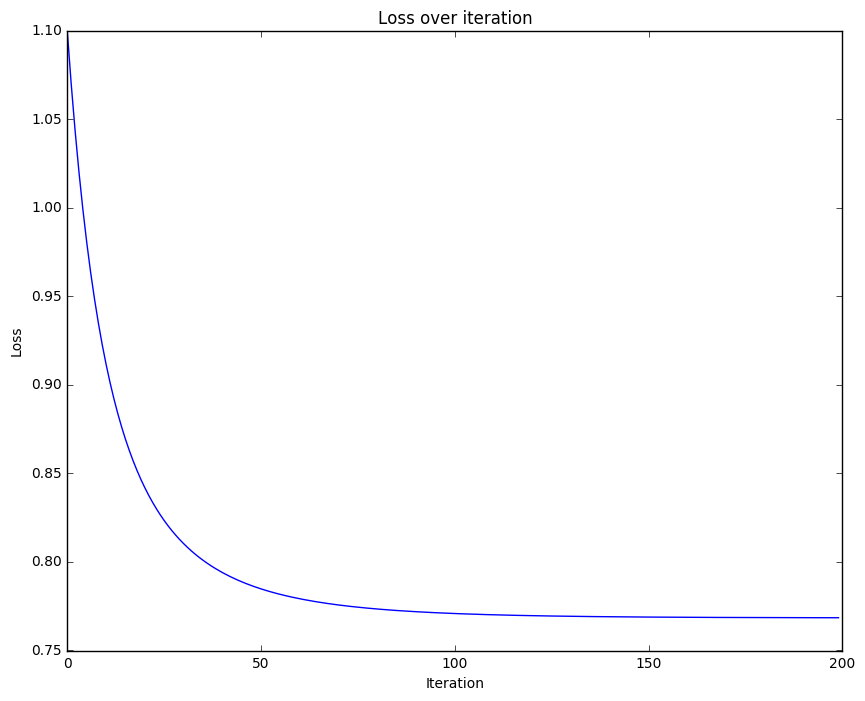

In [10]:
# Plot the loss
plt.plot(loss_history)
plt.title("Loss over iteration")
plt.xlabel("Iteration")
plt.ylabel("Loss")

In [11]:
# Evaluate training set accuracy
scores = X.dot(W) + b
y_pred = np.argmax(scores, axis=1)
print("Training accuracy:", np.mean(y_pred == y))

Training accuracy: 0.52


(-1.8686430832254888, 1.9113569167745146)

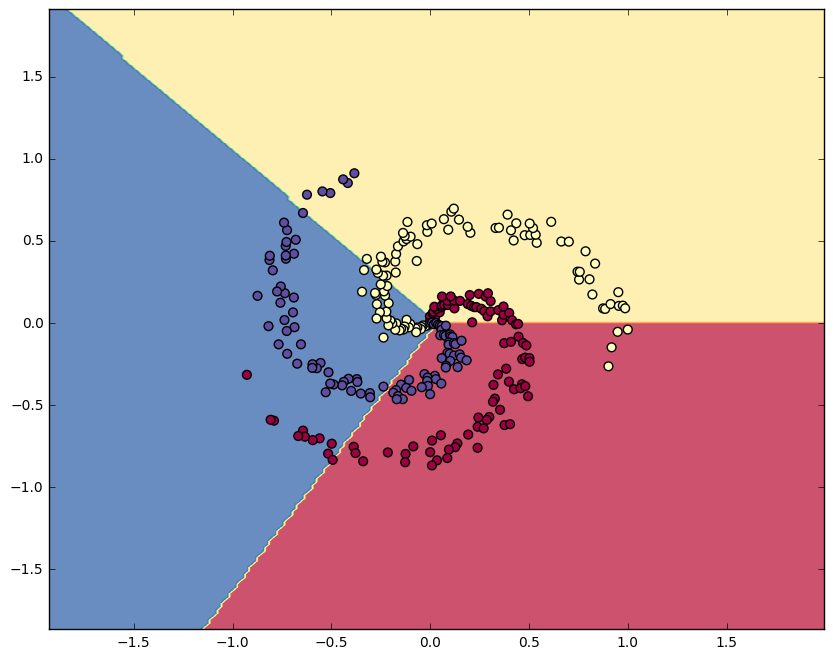

In [12]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_linear.png')

### Training a Neural Network

In [13]:
# Initialize parameters randomly
h = 100 # hidden size
W = 0.01 * np.random.randn(D, h)
b = np.zeros((h,))
W2 = 0.01 * np.random.randn(h, K)
b2 = np.zeros((K,))

In [14]:
# Compute class scores from forward pass
h_out = np.maximum(0, X.dot(W) + b)
scores = h_out.dot(W2) + b2

In [15]:
# Compute the grads
exp_scores = np.exp(scores - np.max(scores, axis=1, keepdims=True))
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

# BP
dscores = probs
dscores[np.arange(num_examples), y] += -1.0
dscores /= num_examples

dW2 = (h_out.T).dot(dscores)
db2 = np.sum(dscores, axis=0)
dh_out = dscores.dot(W2.T)

dh_out = (h_out > 0) * dh_out
dW = (X.T).dot(dh_out)
db = np.sum(dh_out, axis=0)

### Putting it all together: Training a Two-Layer Neural Network

In [16]:
# Initialize the parameters randomly
weight_decay = 1e-2
h = 100 # hidden_size
W1 = weight_decay * np.random.randn(D, h)
b1 = np.zeros((h,))
W2 = weight_decay * np.random.randn(h, K)
b2 = np.zeros((K,))

# Set some hyperparameters
step_size = 8e-1
reg = 1e-3  # L2 regularization

# SGD loop
num_examples = X.shape[0]
num_iterations = 10000
plot_every = 500
loss_history = []
for i in range(num_iterations):
    
    # Forward pass
    h_out = np.maximum(0, X.dot(W1) + b1)
    scores = h_out.dot(W2) + b2
    
    # Compute probs
    exp_scores = np.exp(scores - np.max(scores, axis=1, keepdims=True))
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    # Compute the loss
    data_loss = -np.mean(np.log(probs[np.arange(num_examples), y]))
    reg_loss = 0.5 * reg * (np.sum(W1 ** 2) + np.sum(W2 ** 2))
    loss = data_loss + reg_loss
    loss_history.append(loss)
    if i % plot_every == 0:
        print("Iteration %d: loss %f" % (i, loss))
    
    # Compute the grads
    dscores = probs
    dscores[np.arange(num_examples), y] += -1.0
    dscores /= num_examples
    
    # BP
    dW2 = (h_out.T).dot(dscores) + reg * W2
    db2 = np.sum(dscores, axis=0)
    dh_out = dscores.dot(W2.T)
    
    dh_out = (h_out > 0) * dh_out
    dW1 = (X.T).dot(dh_out) + reg * W1
    db1 = np.sum(dh_out, axis=0)
    
    # Update the params
    params = [W1, b1, W2, b2]
    grads = [dW1, db1, dW2, db2]
    for p, g in zip(params, grads):
        p += -step_size * g

Iteration 0: loss 1.098601
Iteration 500: loss 0.441171
Iteration 1000: loss 0.323228
Iteration 1500: loss 0.286308
Iteration 2000: loss 0.271167
Iteration 2500: loss 0.260416
Iteration 3000: loss 0.255469
Iteration 3500: loss 0.252412
Iteration 4000: loss 0.249800
Iteration 4500: loss 0.248407
Iteration 5000: loss 0.247410
Iteration 5500: loss 0.246860
Iteration 6000: loss 0.246505
Iteration 6500: loss 0.246298
Iteration 7000: loss 0.246147
Iteration 7500: loss 0.246043
Iteration 8000: loss 0.245979
Iteration 8500: loss 0.245930
Iteration 9000: loss 0.245885
Iteration 9500: loss 0.245864


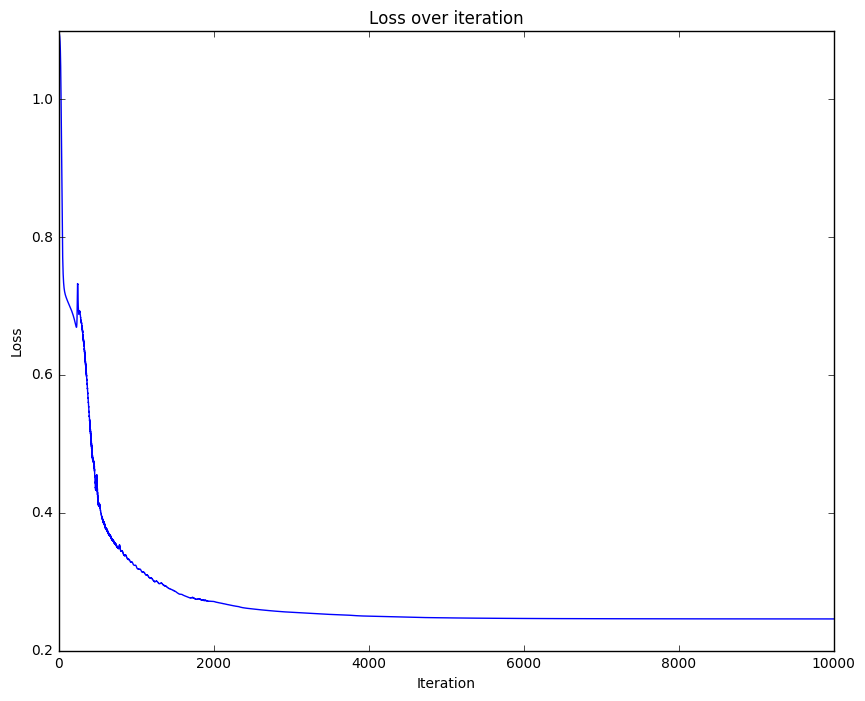

In [17]:
# Plot the loss
plt.plot(loss_history)
plt.title("Loss over iteration")
plt.xlabel("Iteration")
plt.ylabel("Loss")

In [18]:
# Evaluate training set accuracy
h_out = np.maximum(0, X.dot(W1) + b1)
scores = h_out.dot(W2) + b2
y_pred = np.argmax(scores, axis=1)
print("Training accuracy:", np.mean(y_pred == y))

Training accuracy: 0.983333333333


(-1.8686430832254888, 1.9113569167745146)

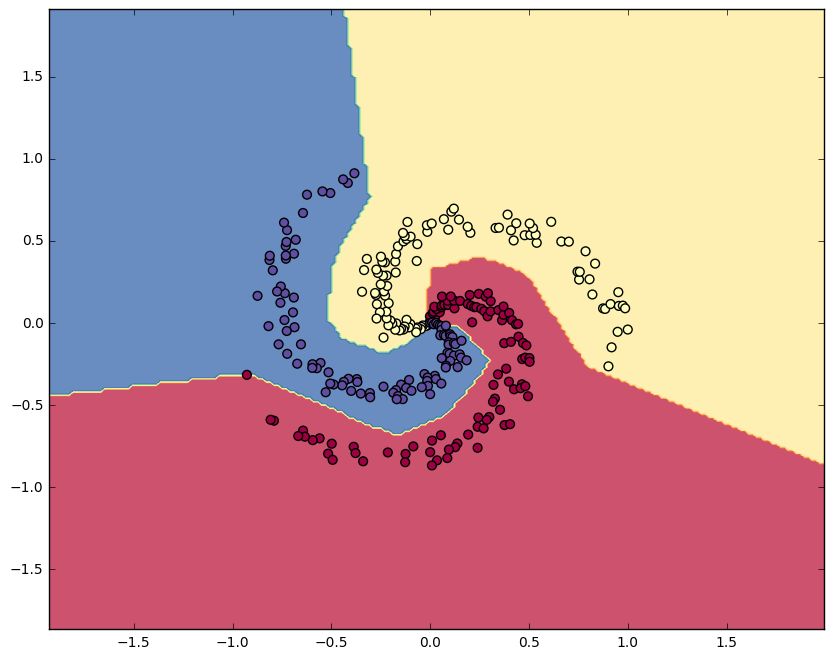

In [19]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_linear.png')